# TODO : modifier l'index pour pouvoir get_recommandations à partir de l'id d'un film

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_csv('./../rawData/imdb-reviews.csv', names=['uId', 'tconst', 'rating', 'timestamp'])
df2 = pd.read_csv('./../cleanedData/movies_w_features.csv')

FileNotFoundError: [Errno 2] No such file or directory: './rawData/imdb-reviews.csv'

In [ ]:
df2

Unnamed: 0         id                                director  \
0                0  tt0000001                  ['williamk.l.dickson']   
1                1  tt0000003                        ['émilereynaud']   
2                2  tt0000005                  ['williamk.l.dickson']   
3                3  tt0000007  ['williamk.l.dickson', 'williamheise']   
4                4  tt0000008                  ['williamk.l.dickson']   
...            ...        ...                                     ...   
283998      283998  tt9916200                          ['ericstoltz']   
283999      283999  tt9916204                          ['johnmurray']   
284000      284000  tt9916270                       ['giacomocimini']   
284001      284001  tt9916362                         ['pabloagüero']   
284002      284002  tt9916428                          ['jixingwang']   

                                                     cast  \
0                          ['carmencita', 'williamheise']   
1                         ['julienpappé', 'gastonpaulin']   
2                            ['charleskayser', 'johnott']   
3                     ['jamesj.corbett', 'petercourtney']   
4                             ['fredott', 'williamheise']   
...                                                   ...   
283998          ['téaleoni', 'timdaly', 'keithcarradine']   
283999          ['téaleoni', 'timdaly', 'keithcarradine']   
284000  ['sergiocastellitto', 'lorenzorichelmy', 'anna...   
284001  ['amaiaaberasturi', 'alexbrendemühl', 'danielf...   
284002     ['kenanheppe', 'wangpengkai', 'valerygadreau']   

                                              title  \
0                                        Carmencita   
1                                    Pauvre Pierrot   
2                                  Blacksmith Scene   
3       Corbett and Courtney Before the Kinetograph   
4            Edison Kinetoscopic Record of a Sneeze   
...                                             ...   
283998                         The Great Experiment   
283999                                Better Angels   
284000                     Il talento del calabrone   
284001                                        Coven   
284002                          The Secret of China   

                                    genres  \
0                 ['documentary', 'short']   
1       ['animation', 'comedy', 'romance']   
2                      ['comedy', 'short']   
3                       ['short', 'sport']   
4                 ['documentary', 'short']   
...                                    ...   
283998               ['drama', 'thriller']   
283999               ['drama', 'thriller']   
284000                        ['thriller']   
284001                ['drama', 'history']   
284002     ['adventure', 'history', 'war']   

                                                     soup  
0       williamk.l.dickson carmencita williamheise doc...  
1       émilereynaud julienpappé gastonpaulin animatio...  
2       williamk.l.dickson charleskayser johnott comed...  
3       williamk.l.dickson williamheise jamesj.corbett...  
4       williamk.l.dickson fredott williamheise docume...  
...                                                   ...  
283998  ericstoltz téaleoni timdaly keithcarradine dra...  
283999  johnmurray téaleoni timdaly keithcarradine dra...  
284000  giacomocimini sergiocastellitto lorenzorichelm...  
284001  pabloagüero amaiaaberasturi alexbrendemühl dan...  
284002  jixingwang kenanheppe wangpengkai valerygadrea...  

[284003 rows x 7 columns]

# Analyse
## KNN features genres, cast, director

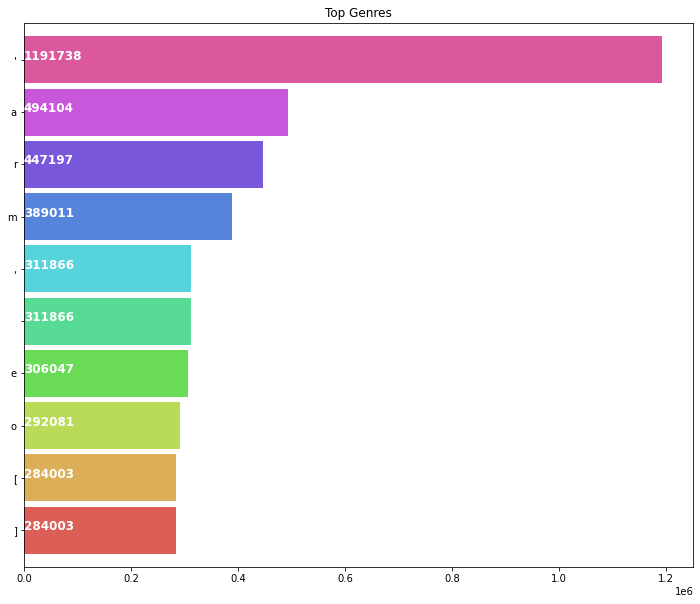

In [ ]:
# FROM https://www.analyticsvidhya.com/blog/2020/08/recommendation-system-k-nearest-neighbors/
plt.subplots(figsize=(12,10))
list1 = []
for i in df2['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

## Cosine similarity recommadeur  sur les genres, cast et directeurs de films

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

df2_small = df2.copy().tail(5000).reset_index()

count = CountVectorizer(stop_words='english')
#count_matrix = count.fit_transform(df2['soup'])
count_matrix = count.fit_transform(df2_small['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
count_matrix

<5000x13325 sparse matrix of type '<class 'numpy.int64'>'
	with 32010 stored elements in Compressed Sparse Row format>

In [ ]:
indices = pd.Series(df2_small.index, index=df2_small['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Secret of China', cosine_sim2)

1798                           Code of the Sea
328                                A Manly Man
352             What Shall We Do with Our Old?
353                           When a Man Loves
354                        When the Cat's Away
355     The Adventures of Lieutenant Petrosino
1931                  Two Wagons: Both Covered
2529                                  Hats Off
4044                     Mother Goose Melodies
4321                             The Big Flash
Name: title, dtype: object